<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## 概要

このラボでは、変数とデータセットのトレンド間の関係を視覚化するために、散布図の作成と解釈に焦点を当てます。提供されたデータセットは、パンダのデータフレームに直接ロードされ、開発者の傾向、補償、および好みを探求するために、さまざまな散布図関連の視覚化が作成されます。


## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


このラボでは、次のようになります。

 - 散布図を作成および分析して、変数間の関係を調べます。

 - 散布図を使用して、データセットのトレンドとパターンを識別します。

 - より良いデータ駆動型の洞察を得るために、散布図を中心とした視覚化に焦点を合わせます。

## Setup: Working with the Database



**Install and import the required libraries**


In [2]:
# !pip install pandas
# !pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.0})


#### Step 1: Load the dataset


In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)


In [4]:
df.head(10)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


In [10]:
#ageカラムのコンバードカラムを作成

def convert_age_to_numeric(age_str):
    if age_str == 'Under 18 years old':
        return 18
    elif age_str == '18-24 years old':
        return 20
    elif age_str == '25-34 years old':
        return 30
    elif age_str == '35-44 years old':
        return 40
    elif age_str == '45-54 years old':
        return 50
    elif age_str == '55-64 years old':
        return 60
    elif age_str == '65 years or older':
        return 65
    else:
        return None

# Age
df['Age_numeric'] = df['Age'].apply(convert_age_to_numeric)
df['Age_numeric'].fillna(df['Age_numeric'].mean(), inplace=True)
pd.concat([df['Age'], df['Age_numeric']], axis=1).head(10)



,Age,Age_numeric
0,Under 18 years old,18.0
1,35-44 years old,40.0
2,45-54 years old,50.0
3,18-24 years old,20.0
4,18-24 years old,20.0
5,Under 18 years old,18.0
6,35-44 years old,40.0
7,18-24 years old,20.0
8,45-54 years old,50.0
9,35-44 years old,40.0


In [11]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Age_numeric
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,40.0
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,50.0
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,20.0
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,20.0



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




回答者の年齢（「年齢」）と仕事の満足度（ `jovesatpoints_6`）の関係を視覚化します。このプロットを使用して、パターンまたはトレンドを識別します。

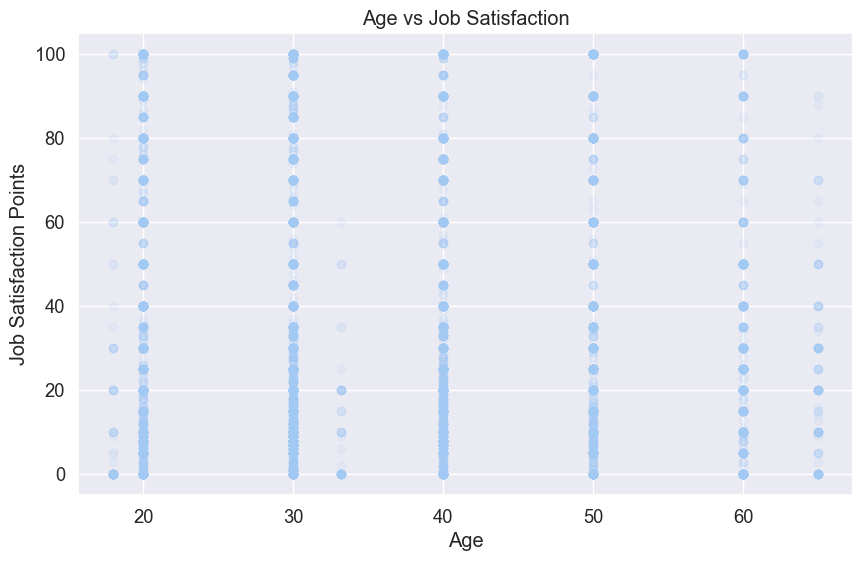

In [15]:
## Write your code herd

plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['JobSatPoints_6'], alpha=0.1)
plt.title('Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()



#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


散布図を使用して、毎年の補償（「Convertedcompyearly」）と仕事の満足度（ `jowsatpoints_6`）の関係を調べます。

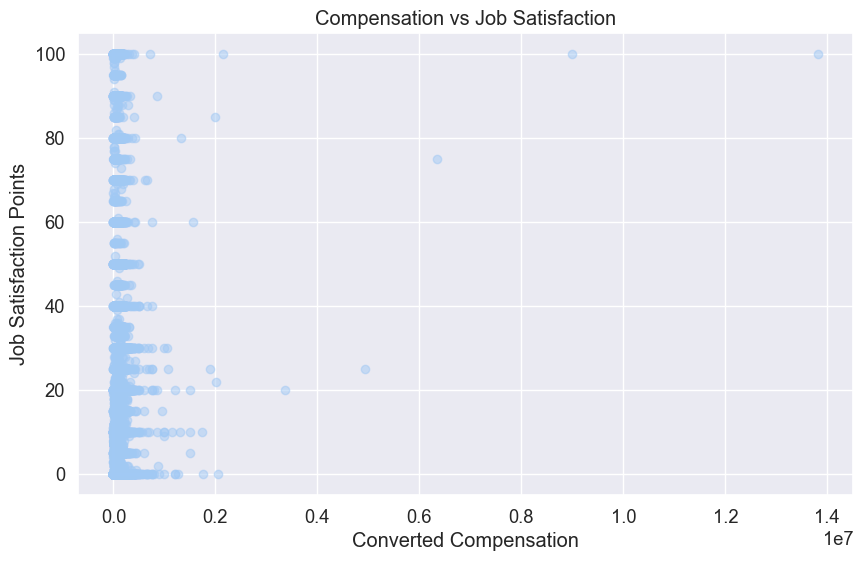

In [7]:
## Write your code here

figure = plt.figure(figsize=(10, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Compensation vs Job Satisfaction')
plt.xlabel('Converted Compensation')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


データのトレンドを強調するには、年齢とjobsatpoints_6の散布図に回帰線を追加します。

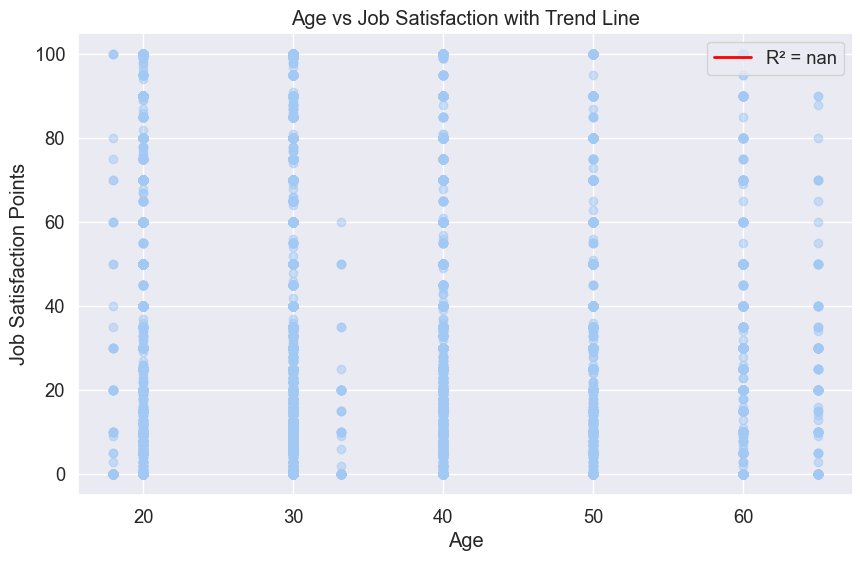

In [17]:
## Write your code here

import numpy as np
from scipy import stats

plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['JobSatPoints_6'], alpha=0.5)

# Calculate trend line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Age_numeric'], df['JobSatPoints_6'])
line = slope * df['Age_numeric'] + intercept
plt.plot(df['Age_numeric'], line, color='red', label=f'R² = {r_value**2:.2f}')

plt.title('Age vs Job Satisfaction with Trend Line')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction Points')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


散布図を使用して、年齢（「年齢」）と実務経験（ 'yearscodepro`）の関係を視覚化します。

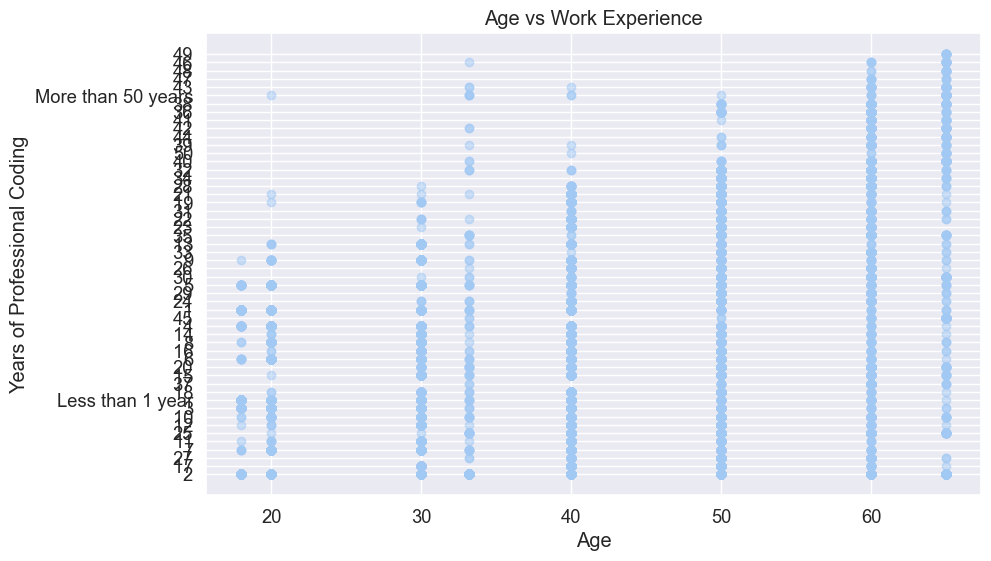

In [33]:
## Write your code here

#YearsCodeProカラムの欠損地を修正
df['YearsCodePro'].fillna(df['YearsCodePro'].mode()[0], inplace=True)

plt.figure(figsize=(10, 6))
plt.scatter(df['Age_numeric'], df['YearsCodePro'], alpha=0.5)
plt.title('Age vs Work Experience')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.grid(True)
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


バブルプロットを作成して、年齢を表すバブルサイズで、毎年の補償（「compcearly」」と仕事の満足度（ `jobesatpoints_6`）との関係を調査します。

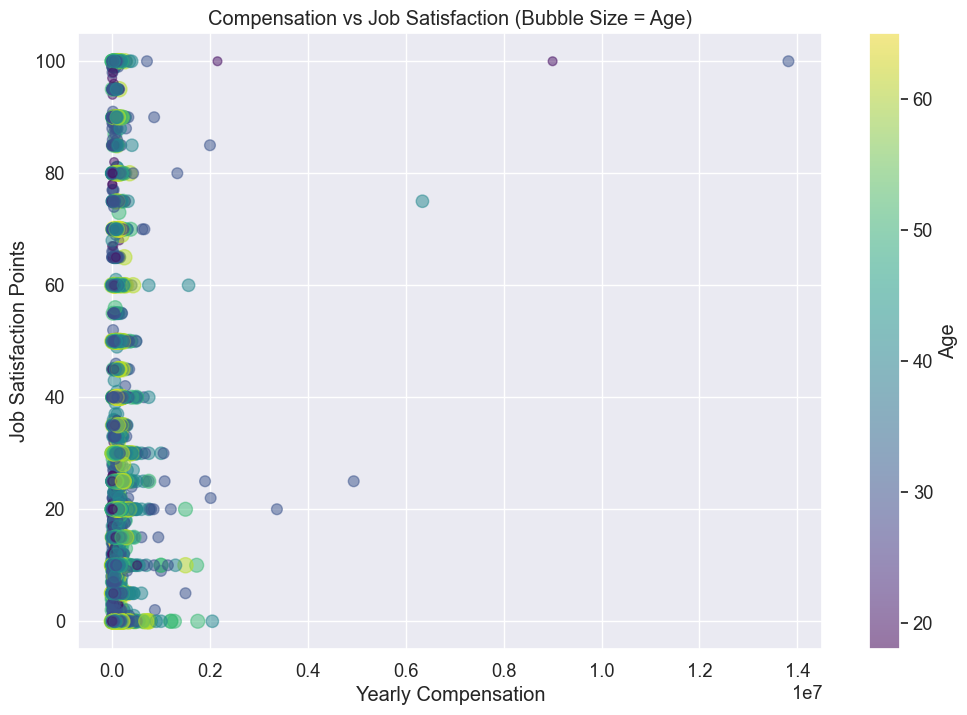

In [23]:
## Write your code here

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['ConvertedCompYearly'], 
                     df['JobSatPoints_6'], 
                     s=df['Age_numeric']*2,  # Bubble size based on age
                     alpha=0.5,
                     c=df['Age_numeric'],    # Color based on age
                     cmap='viridis')
plt.colorbar(scatter, label='Age')
plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


散布図を使用して、ジョブの満足度に対して、プログラミング言語（ `LanguageHaveWorked」の人気を視覚化します。ポイントを使用して、各言語の満足度レベルを表します。


/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_4401/538034828.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['LanguageHaveWorkedWith'].str.contains(lang, na=False)


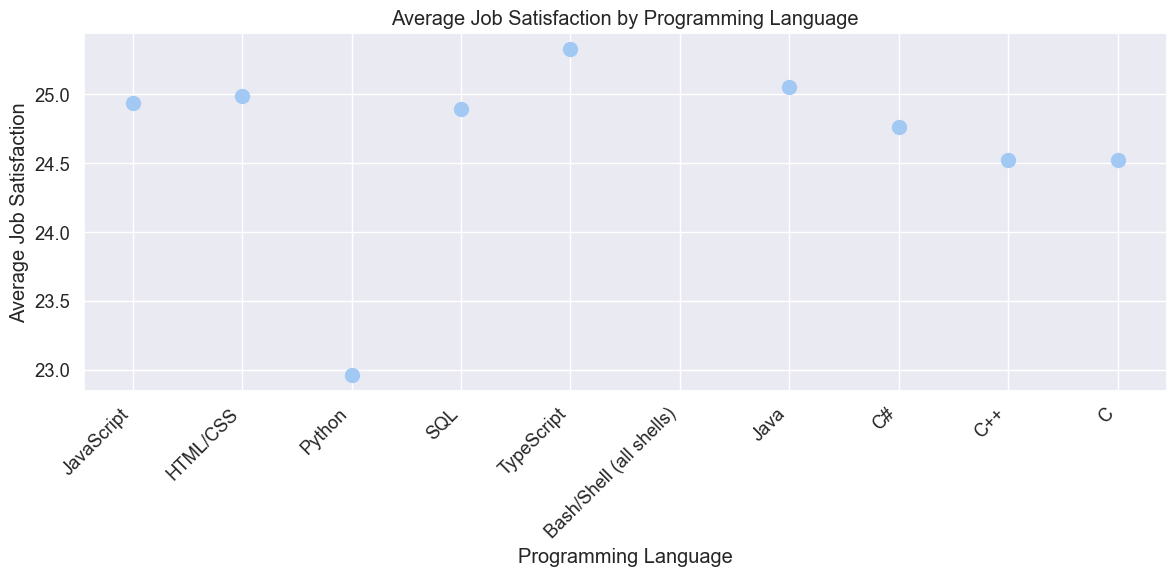

In [34]:
#write your code here

# Get the top 10 most popular languages
language_counts = df['LanguageHaveWorkedWith'].str.split(';').explode().value_counts().head(10)
top_languages = language_counts.index

# Calculate average job satisfaction for each language
language_satisfaction = {}
for lang in top_languages:
    mask = df['LanguageHaveWorkedWith'].str.contains(lang, na=False)
    language_satisfaction[lang] = df[mask]['JobSatPoints_6'].mean()

plt.figure(figsize=(12, 6))
plt.scatter(range(len(language_satisfaction)), 
           list(language_satisfaction.values()),
           s=100)
plt.xticks(range(len(language_satisfaction)), 
           list(language_satisfaction.keys()), 
           rotation=45, ha='right')
plt.title('Average Job Satisfaction by Programming Language')
plt.xlabel('Programming Language')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


雇用タイプ（「雇用」）によって分類された、毎年の報酬（compertedcompyearly」と仕事の満足度（ `jowsatpoints_6`）との関係を視覚化します。カラーコーディングまたはマーカーを使用して、雇用タイプを区別します。

/var/folders/np/lj2crsq11vl__dd5tfxv027m0000gn/T/ipykernel_4401/2899384583.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


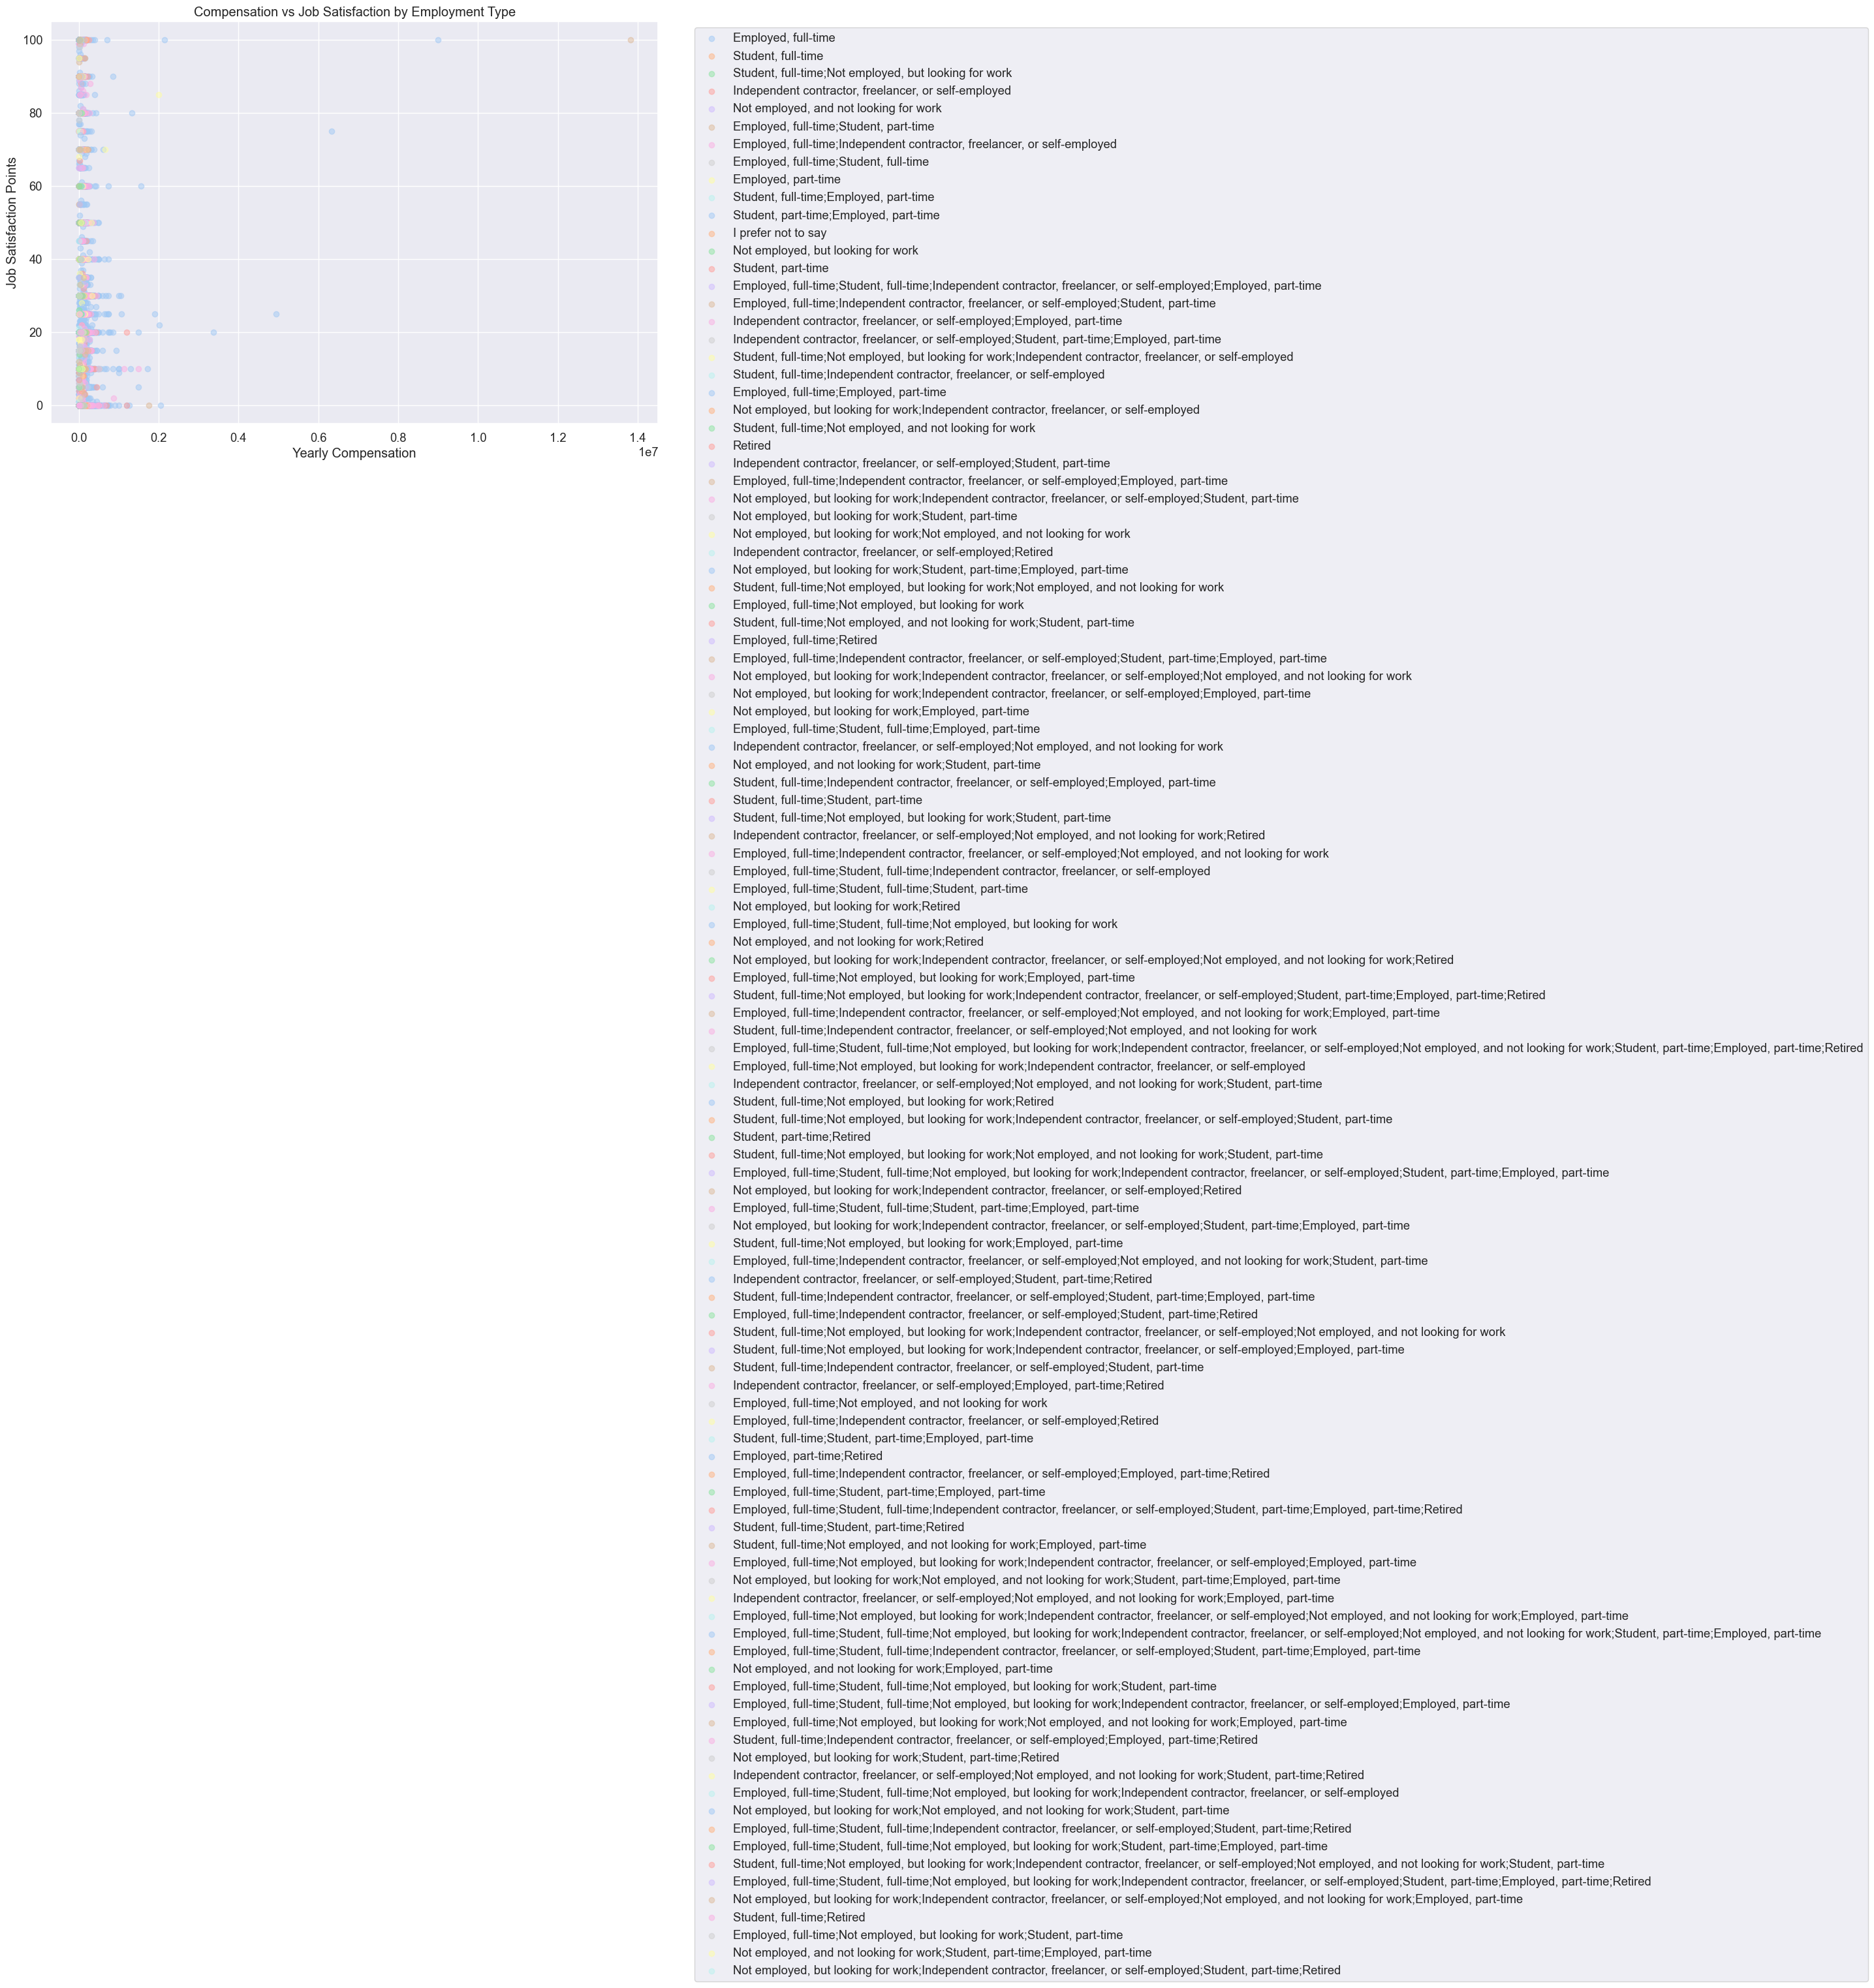

In [35]:
## Write your code here


plt.figure(figsize=(12, 8))
employment_types = df['Employment'].unique()

for emp_type in employment_types:
    mask = df['Employment'] == emp_type
    plt.scatter(df[mask]['ConvertedCompYearly'],
                df[mask]['JobSatPoints_6'],
                alpha=0.5,
                label=emp_type)

plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction Points')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


さまざまな年齢層（「年齢」）と国（「国」）にわたって実務経験（「Yearcodepro」）を比較します。色を使用して、年齢層のさまざまな国とマーカーを表します。

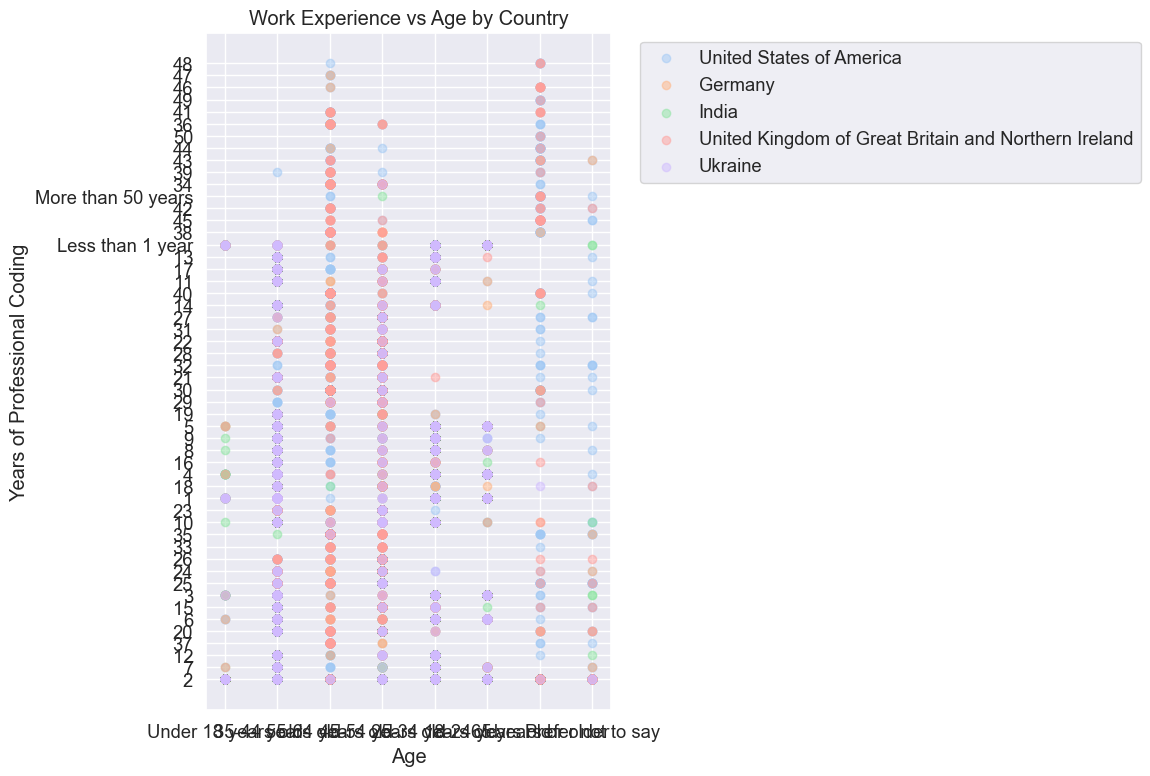

In [36]:
## Write your code here

# Select top 5 countries by number of respondents
top_countries = df['Country'].value_counts().head(5).index

plt.figure(figsize=(12, 8))
for country in top_countries:
    mask = df['Country'] == country
    plt.scatter(df[mask]['Age'],
                df[mask]['YearsCodePro'],
                alpha=0.5,
                label=country)

plt.title('Work Experience vs Age by Country')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final Step: Review


これらの散布図を使用すると、開発者コミュニティの有意義な傾向を明らかにするために、補償、仕事の満足度、雇用タイプ、人口統計など、複数の次元にわたってデータ関係を分析します。


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


このラボを完成させると、次のことができます。
 - 雇用タイプや国などの特定のグループ間で数値変数がどのように関連するかを分析します。
 - 散布図を効果的に使用して、色、サイズ、マーカーを備えた複数の変数を表します。
 - 高度な散布図技術を使用した補償、満足度、および人口統計の傾向に関する洞察を得る。

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
